In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anthony_wrangle

In [2]:
train, validate, test = anthony_wrangle.wrangle_credit()

In [3]:
train.shape, validate.shape, test.shape

((26248, 49), (6563, 49), (3646, 49))

In [4]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,0,0,-40.0
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,0,0,14.0
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,0,0,1,0,0,0,0,0,0,74.0
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,0,0,1,0,0,0,0,0,0,93.0
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,0,0,1,38.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26248 entries, 32073 to 18632
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 26248 non-null  object 
 1   flag_own_car                                       26248 non-null  int64  
 2   flag_own_realty                                    26248 non-null  int64  
 3   cnt_children                                       26248 non-null  int64  
 4   amt_income_total                                   26248 non-null  float64
 5   days_birth                                         26248 non-null  int64  
 6   days_employed                                      26248 non-null  int64  
 7   flag_mobil                                         26248 non-null  int64  
 8   flag_work_phone                                    26248 non-null  int64  
 9   fl

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


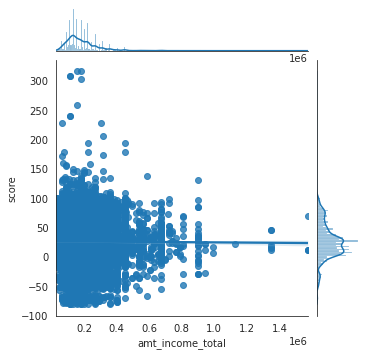

In [6]:
with sns.axes_style('white'):
    j = sns.jointplot("amt_income_total", "score", data=train, kind='reg', height=5);


In [7]:
train.amt_income_total.value_counts()

135000.0     3130
180000.0     2266
157500.0     2260
112500.0     2107
225000.0     2103
             ... 
160200.0        1
432000.0        1
1125000.0       1
177012.0        1
204750.0        1
Name: amt_income_total, Length: 253, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


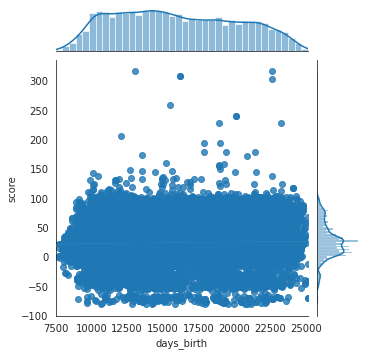

In [8]:
with sns.axes_style('white'):
    j = sns.jointplot("days_birth", "score", data=train, kind='reg', height=5);


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


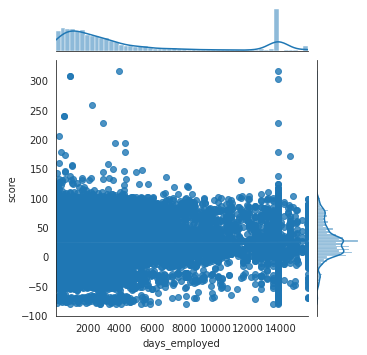

In [9]:
with sns.axes_style('white'):
    j = sns.jointplot("days_employed", "score", data=train, kind='reg', height=5);

In [10]:
train.score.value_counts()

26.0     714
32.0     611
34.0     610
28.0     588
30.0     588
        ... 
113.0      1
147.0      1
143.0      1
158.0      1
135.0      1
Name: score, Length: 234, dtype: int64

In [11]:
min(train.score)

-81.0

In [12]:
max(train.score)

316.0

<AxesSubplot:ylabel='Frequency'>

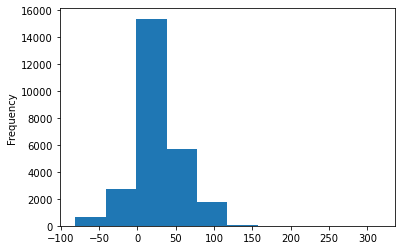

In [13]:
train['score'].plot(kind='hist')

In [14]:
train.score.describe()

count    26248.000000
mean        26.020954
std         31.704498
min        -81.000000
25%          7.000000
50%         24.000000
75%         44.000000
max        316.000000
Name: score, dtype: float64

In [15]:
#Negative score indicates a 'good' credit canditate. 
#It's a combination of making payments on time and length of credit history.

In [16]:
pd.qcut(train['score'], q=4)

32073    (-81.001, 7.0]
31598       (7.0, 24.0]
24158     (44.0, 316.0]
34581     (44.0, 316.0]
16771      (24.0, 44.0]
              ...      
4339        (7.0, 24.0]
29856       (7.0, 24.0]
10997      (24.0, 44.0]
36434    (-81.001, 7.0]
18632      (24.0, 44.0]
Name: score, Length: 26248, dtype: category
Categories (4, interval[float64]): [(-81.001, 7.0] < (7.0, 24.0] < (24.0, 44.0] < (44.0, 316.0]]

In [17]:
train['quantile_score'] = pd.qcut(train['score'], q=4)

In [18]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score,quantile_score
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,0,-40.0,"(-81.001, 7.0]"
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,0,14.0,"(7.0, 24.0]"
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,0,1,0,0,0,0,0,0,74.0,"(44.0, 316.0]"
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,0,1,0,0,0,0,0,0,93.0,"(44.0, 316.0]"
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,0,1,38.0,"(24.0, 44.0]"


In [19]:
train.quantile_score.value_counts()

(7.0, 24.0]       6801
(-81.001, 7.0]    6660
(24.0, 44.0]      6467
(44.0, 316.0]     6320
Name: quantile_score, dtype: int64

In [20]:
bin_labels_4 = ['Great', 'Good', 'Average', 'Poor']
train['quantile_label'] = pd.qcut(train['score'],
                              q=[0, .25, .50, .75, 1],
                              labels=bin_labels_4)

In [21]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,...,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score,quantile_score,quantile_label
32073,5135805,0,1,0,90000.0,19482,2878,1,0,0,...,0,0,0,0,0,0,0,-40.0,"(-81.001, 7.0]",Great
31598,5132791,0,1,2,180000.0,13361,6586,1,1,0,...,0,0,0,0,0,0,0,14.0,"(7.0, 24.0]",Good
24158,5096773,0,0,0,171000.0,21700,13879,1,0,0,...,1,0,0,0,0,0,0,74.0,"(44.0, 316.0]",Poor
34581,5146247,0,1,0,238500.0,23171,13879,1,0,0,...,1,0,0,0,0,0,0,93.0,"(44.0, 316.0]",Poor
16771,5067027,0,1,1,135000.0,13589,1649,1,0,0,...,0,0,0,0,0,0,1,38.0,"(24.0, 44.0]",Average


Text(0.5, 1.0, 'Distribution of Credit Worthiness')

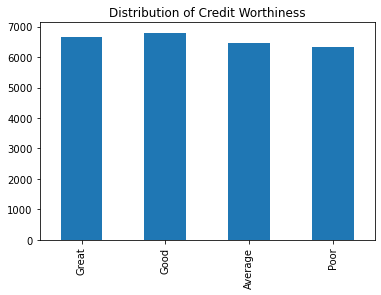

In [22]:
train.quantile_label.value_counts().sort_index().plot.bar()
plt.title("Distribution of Credit Worthiness")


In [26]:
pd.crosstab(train.quantile_label, train.flag_own_realty, margins=True)


flag_own_realty,0,1,All
quantile_label,,,
Great,2124,4536,6660
Good,2072,4729,6801
Average,2209,4258,6467
Poor,2185,4135,6320
All,8590,17658,26248


In [27]:
pd.crosstab(train.quantile_label, train.flag_own_realty).apply(lambda r: r/r.sum(), axis=1)


flag_own_realty,0,1
quantile_label,,
Great,0.318919,0.681081
Good,0.304661,0.695339
Average,0.341580,0.658420
Poor,0.345728,0.654272


In [28]:
pd.crosstab(train.quantile_label, train.flag_own_car).apply(lambda r: r/r.sum(), axis=1)


flag_own_car,0,1
quantile_label,,
Great,0.624925,0.375075
Good,0.624908,0.375092
Average,0.612340,0.387660
Poor,0.606804,0.393196


In [ ]:
#No apparent relationship betwe